Importing Libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd

Mounted at /content/drive


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor

In [3]:
df1 = pd.read_csv('/content/drive/MyDrive/finalproject/merged_data.csv')

Splitting the dataset

In [4]:
df2 = df1
cols = ['FSO_Att','RFL_Att']
x = df2.drop(cols, axis=1)

In [5]:
y2 = df1['RFL_Att']

Feature selection for Extra trees regressor

In [16]:
all_features = list(range(x.shape[1]))
current_features = all_features.copy()

In [17]:
results = pd.DataFrame(columns=['Features', 'R_squared', 'RMSE'])


In [18]:
while len(current_features) > 1:
    X_train, X_test, y_train, y_test = train_test_split(x.iloc[:, current_features], y2, test_size=0.25, random_state=42)
    model = ExtraTreesRegressor(n_estimators=100, oob_score=True, bootstrap=True, random_state=42)
    model.fit(X_train, y_train)
    oobscore = model.oob_score_
    importancelst = model.feature_importances_
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    resultlst = pd.DataFrame([{
        'Features': ', '.join(map(str, current_features)),
        'R_squared': r2,
        'RMSE': rmse
    }])
    results = pd.concat([results, resultlst], ignore_index=True)
    feature_importances = {feature: importance for feature, importance in zip(current_features, importancelst)}
    sorted_features = sorted(feature_importances, key=feature_importances.get)
    least_significant_feature = sorted_features[0]
    current_features.remove(least_significant_feature)

<ipython-input-18-dd260e55e8e6>:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, resultlst], ignore_index=True)


In [19]:
results.to_csv('f1results.csv', index=False)

print("DataFrame saved to 'f1results.csv'.")

DataFrame saved to 'f1results.csv'.


In [20]:
results

,Features,R_squared,RMSE
0,"0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, ...",0.919039,0.766140
1,"0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, ...",0.916724,0.777017
2,"0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, ...",0.920233,0.760470
3,"0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, ...",0.917859,0.771702
4,"0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, ...",0.922241,0.750838
5,"0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, ...",0.922405,0.750044
6,"0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, ...",0.921621,0.753826
7,"0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15,...",0.918610,0.768170
8,"0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 13, 15, 16,...",0.918220,0.770005
9,"0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 13, 15, 16, 19",0.917373,0.773986


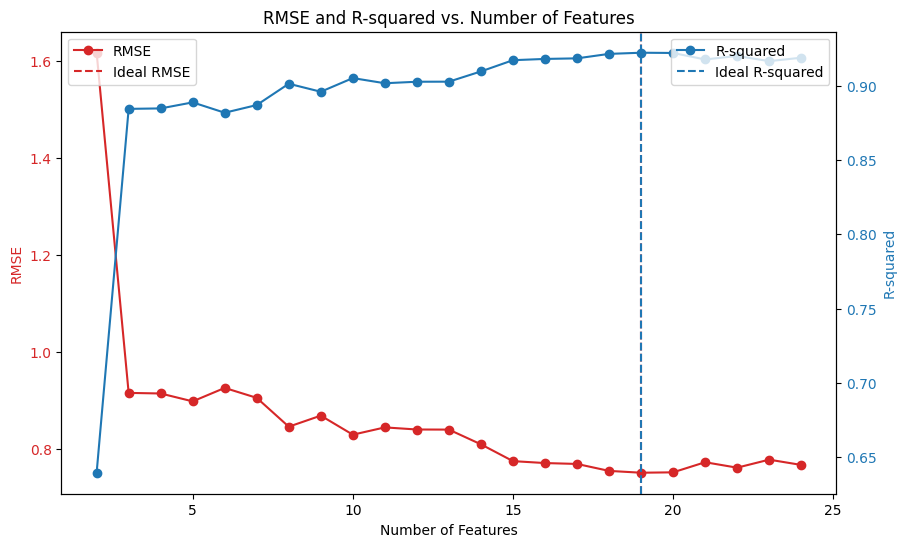

In [21]:
results['Num_Features'] = results['Features'].apply(lambda x: len(x.split(', ')))
ideal_rmse_idx = results['RMSE'].idxmin()
ideal_r2_idx = results['R_squared'].idxmax()
fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:red'
ax1.set_xlabel('Number of Features')
ax1.set_ylabel('RMSE', color=color)
ax1.plot(results['Num_Features'], results['RMSE'], color=color, marker='o', label='RMSE')
ax1.axvline(x=results['Num_Features'][ideal_rmse_idx], color=color, linestyle='--', label='Ideal RMSE')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('R-squared', color=color)
ax2.plot(results['Num_Features'], results['R_squared'], color=color, marker='o', label='R-squared')
ax2.axvline(x=results['Num_Features'][ideal_r2_idx], color=color, linestyle='--', label='Ideal R-squared')
ax2.tick_params(axis='y', labelcolor=color)

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')


plt.title('RMSE and R-squared vs. Number of Features')
plt.show()

Feature Selection for Random Forest Regressor

In [22]:
all_features = list(range(x.shape[1]))
current_features = all_features.copy()

In [23]:
results = pd.DataFrame(columns=['Features', 'R_squared', 'RMSE'])

In [24]:
while len(current_features) > 1:
    X_train, X_test, y_train, y_test = train_test_split(x.iloc[:, current_features], y2, test_size=0.25, random_state=42)
    model = RandomForestRegressor(n_estimators=100, oob_score=True, bootstrap=True, random_state=42)
    model.fit(X_train, y_train)
    oobscore = model.oob_score_
    importancelst = model.feature_importances_
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    resultlst = pd.DataFrame([{
        'Features': ', '.join(map(str, current_features)),
        'R_squared': r2,
        'RMSE': rmse
    }])
    results = pd.concat([results, resultlst], ignore_index=True)
    feature_importances = {feature: importance for feature, importance in zip(current_features, importancelst)}
    sorted_features = sorted(feature_importances, key=feature_importances.get)
    least_significant_feature = sorted_features[0]
    current_features.remove(least_significant_feature)

<ipython-input-24-f74dbb97429d>:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, resultlst], ignore_index=True)


In [25]:
results.to_csv('f1results1.csv', index=False)

print("DataFrame saved to 'f1results1.csv'.")

DataFrame saved to 'f1results1.csv'.


In [26]:
results

,Features,R_squared,RMSE
0,"0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, ...",0.826276,1.122279
1,"0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, ...",0.822007,1.135986
2,"0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, ...",0.818186,1.148112
3,"0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 13, 14, 15,...",0.830329,1.109111
4,"0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 13, 14, 15,...",0.821094,1.138896
5,"0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 13, 14, 15,...",0.821435,1.137808
6,"0, 1, 2, 3, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16...",0.814847,1.158608
7,"0, 1, 2, 3, 6, 7, 8, 9, 10, 11, 14, 15, 16, 18...",0.813764,1.161992
8,"0, 1, 2, 3, 6, 8, 9, 10, 11, 14, 15, 16, 18, 1...",0.811767,1.168204
9,"0, 1, 2, 3, 6, 8, 9, 10, 11, 14, 15, 16, 18, 2...",0.821457,1.137738


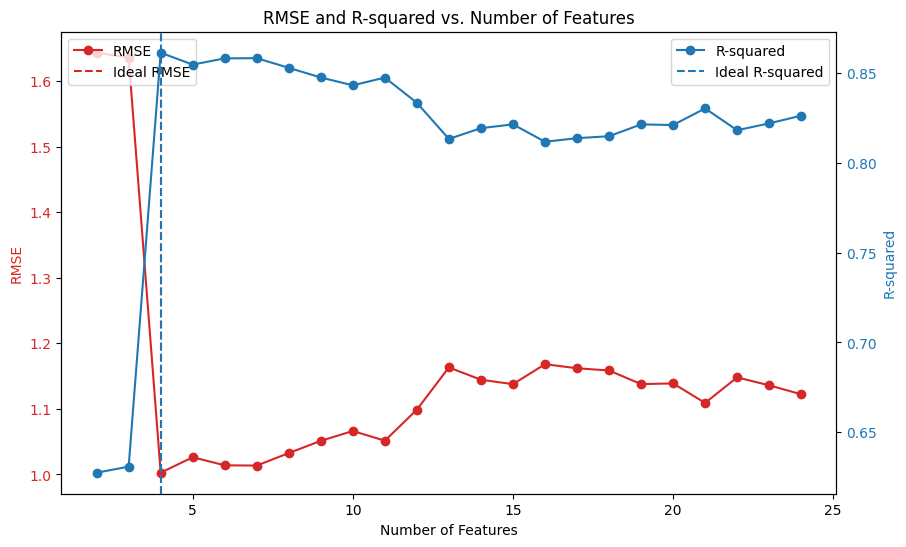

In [27]:
results['Num_Features'] = results['Features'].apply(lambda x: len(x.split(', ')))
ideal_rmse_idx = results['RMSE'].idxmin()
ideal_r2_idx = results['R_squared'].idxmax()
fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:red'
ax1.set_xlabel('Number of Features')
ax1.set_ylabel('RMSE', color=color)
ax1.plot(results['Num_Features'], results['RMSE'], color=color, marker='o', label='RMSE')
ax1.axvline(x=results['Num_Features'][ideal_rmse_idx], color=color, linestyle='--', label='Ideal RMSE')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('R-squared', color=color)
ax2.plot(results['Num_Features'], results['R_squared'], color=color, marker='o', label='R-squared')
ax2.axvline(x=results['Num_Features'][ideal_r2_idx], color=color, linestyle='--', label='Ideal R-squared')
ax2.tick_params(axis='y', labelcolor=color)

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')


plt.title('RMSE and R-squared vs. Number of Features')
plt.show()